In [83]:
import pandas as pd

occupancy = pd.read_csv('occupancy.csv')
occupancy.head(250)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.718000,26.290000,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
245,2/12/2015 19:00,22.133333,24.700000,0.000000,732.666667,0.004069,0
246,2/12/2015 20:00,22.100000,24.700000,0.000000,727.000000,0.004061,0
247,2/12/2015 21:00,22.100000,24.675000,0.000000,716.000000,0.004057,0
248,2/12/2015 22:00,22.066667,24.666667,0.000000,723.250000,0.004047,0


In [84]:
occupancy.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [87]:
# change date column type to datetime
occupancy.date = pd.to_datetime(occupancy.date)
occupancy.head()
# use date dolumn as index
occupancy.index = pd.DatetimeIndex(occupancy.date, freq='H')
occupancy

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,,
2015-02-02 14:00:00,2015-02-02 14:00:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
2015-02-02 15:00:00,2015-02-02 15:00:00,23.718000,26.290000,578.400000,760.400000,0.004773,1
2015-02-02 16:00:00,2015-02-02 16:00:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
2015-02-02 17:00:00,2015-02-02 17:00:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
2015-02-02 18:00:00,2015-02-02 18:00:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2015-05-24 09:00:00,2015-05-24 09:00:00,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2015-05-24 10:00:00,2015-05-24 10:00:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2015-05-24 11:00:00,2015-05-24 11:00:00,24.330000,25.700000,817.000000,1125.800000,0.004841,1


In [88]:
2664/24

111.0

mean : 717.7813974686562


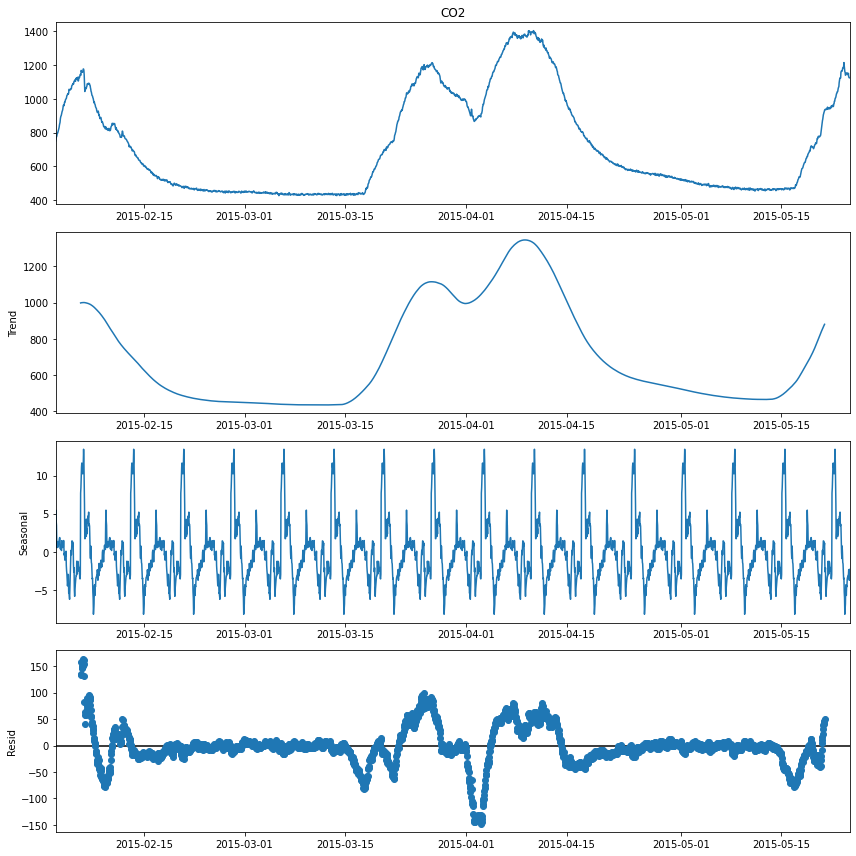

In [109]:
import statsmodels.api as sm

# import matplotlib.pyplot as plt
%matplotlib inline
print('mean :' , occupancy.CO2.mean())
#res = sm.tsa.seasonal_decompose(occupancy.CO2)
res = sm.tsa.seasonal_decompose(occupancy.CO2, period=24*7)

with plt.rc_context():
    plt.rc("figure", figsize=(12,12))
    res.plot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

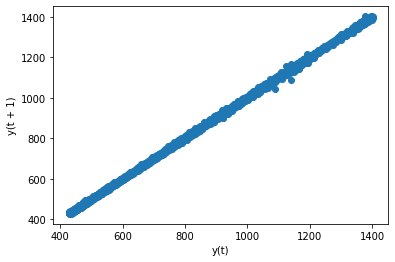

In [96]:
from pandas.plotting import lag_plot


lag_plot(occupancy.CO2)
# import matplotlib.pyplot as plt
# occupancy.plot(x=occupancy.CO2, y=occupancy.CO2)

p is the auto-regressive part of the model. It allows us to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days.


In [97]:
from statsmodels.tsa.arima.model import ARIMA

In [98]:
train, test = occupancy.CO2[:-10], occupancy.CO2[-10:]
#                                  Reserve last 10 datapoints for test
# autoregression model, look back 2 steps
#model = ARIMA(train, order=[p,d,q])
model = ARIMA(train, order=[2,0,0])
#model = ARIMA(occupancy.CO2, order=[2,0,0])
model_fit = model.fit()

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
predictions



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2015-05-24 04:00:00    1153.288267
2015-05-24 05:00:00    1153.414694
2015-05-24 06:00:00    1153.363200
2015-05-24 07:00:00    1153.263893
2015-05-24 08:00:00    1153.151754
2015-05-24 09:00:00    1153.036187
2015-05-24 10:00:00    1152.919722
2015-05-24 11:00:00    1152.803039
2015-05-24 12:00:00    1152.686319
2015-05-24 13:00:00    1152.569612
Freq: H, Name: predicted_mean, dtype: float64

In [99]:
occupancy.CO2[-10:]

date
2015-05-24 04:00:00    1153.250000
2015-05-24 05:00:00    1152.400000
2015-05-24 06:00:00    1146.166667
2015-05-24 07:00:00    1145.400000
2015-05-24 08:00:00    1140.800000
2015-05-24 09:00:00    1150.250000
2015-05-24 10:00:00    1129.200000
2015-05-24 11:00:00    1125.800000
2015-05-24 12:00:00    1123.000000
2015-05-24 13:00:00    1124.000000
Freq: H, Name: CO2, dtype: float64

In [ ]:
print(model_fit.params)

In [100]:
pd.DataFrame({'observed':occupancy.CO2, 'predicted':predictions})[-10:]

,observed,predicted
date,,
2015-05-24 04:00:00,1153.250000,1153.288267
2015-05-24 05:00:00,1152.400000,1153.414694
2015-05-24 06:00:00,1146.166667,1153.363200
2015-05-24 07:00:00,1145.400000,1153.263893
2015-05-24 08:00:00,1140.800000,1153.151754
2015-05-24 09:00:00,1150.250000,1153.036187
2015-05-24 10:00:00,1129.200000,1152.919722
2015-05-24 11:00:00,1125.800000,1152.803039
2015-05-24 12:00:00,1123.000000,1152.686319


In [101]:
# but: for AR model to work, the series should be stationary, which means that there is no long range trend
from statsmodels.tsa.stattools import adfuller
# H0: series is not stationary
# H1: series is stationary
adfuller(occupancy.CO2)[1]


0.06822624483241069

In [103]:
# p is low, H0 must go? p > 0.05, we do not reject the null-hypothesis
# so the data is not stationary

q is the moving average part of the model. This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.

In [104]:
# combined AutoRegression, Moving Average model
# Let's try a moving average model:
# Not to be confused with the concept of 'moving average'
# Note: Moving Average of the error term, not of the base values
# X(t) = mu + e(t) + phi(1)*e(t-1) + phi(2)*e(t-2) + ... phi(q)e(t-q)

model = ARIMA(train, order=[2,0,1])
model_fit = model.fit()

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
predictions

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2015-05-24 04:00:00    1153.390744
2015-05-24 05:00:00    1154.245643
2015-05-24 06:00:00    1155.064895
2015-05-24 07:00:00    1155.848703
2015-05-24 08:00:00    1156.597267
2015-05-24 09:00:00    1157.310791
2015-05-24 10:00:00    1157.989478
2015-05-24 11:00:00    1158.633533
2015-05-24 12:00:00    1159.243160
2015-05-24 13:00:00    1159.818567
Freq: H, Name: predicted_mean, dtype: float64

In [ ]:
print(model_fit.params)

In [105]:
pd.DataFrame({'observed':occupancy.CO2, 'predicted':predictions})[-10:]

,observed,predicted
date,,
2015-05-24 04:00:00,1153.250000,1153.390744
2015-05-24 05:00:00,1152.400000,1154.245643
2015-05-24 06:00:00,1146.166667,1155.064895
2015-05-24 07:00:00,1145.400000,1155.848703
2015-05-24 08:00:00,1140.800000,1156.597267
2015-05-24 09:00:00,1150.250000,1157.310791
2015-05-24 10:00:00,1129.200000,1157.989478
2015-05-24 11:00:00,1125.800000,1158.633533
2015-05-24 12:00:00,1123.000000,1159.243160


d is the integrated part of the model. This includes terms in the model that incorporate the amount of differencing (i.e. the number of past time points to subtract from the current value) to apply to the time series. Intuitively, this would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.


In [106]:
train, test = occupancy.CO2[:-10], occupancy.CO2[-10:]
#                                  Reserve last 10 datapoints for test
# Now we introduce an I (integration) term
model = ARIMA(train, order=[2,1,1])
model_fit = model.fit()

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
predictions

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2015-05-24 04:00:00    1154.135052
2015-05-24 05:00:00    1155.611004
2015-05-24 06:00:00    1157.062004
2015-05-24 07:00:00    1158.500485
2015-05-24 08:00:00    1159.927671
2015-05-24 09:00:00    1161.343756
2015-05-24 10:00:00    1162.748834
2015-05-24 11:00:00    1164.142991
2015-05-24 12:00:00    1165.526313
2015-05-24 13:00:00    1166.898885
Freq: H, Name: predicted_mean, dtype: float64

In [ ]:
print(model_fit.params)

In [107]:
pd.DataFrame({'observed':occupancy.CO2, 'predicted':predictions})[-10:]

,observed,predicted
date,,
2015-05-24 04:00:00,1153.250000,1154.135052
2015-05-24 05:00:00,1152.400000,1155.611004
2015-05-24 06:00:00,1146.166667,1157.062004
2015-05-24 07:00:00,1145.400000,1158.500485
2015-05-24 08:00:00,1140.800000,1159.927671
2015-05-24 09:00:00,1150.250000,1161.343756
2015-05-24 10:00:00,1129.200000,1162.748834
2015-05-24 11:00:00,1125.800000,1164.142991
2015-05-24 12:00:00,1123.000000,1165.526313


In [ ]:
# why is model not improving?

In [ ]:
# need to incluse seasonality : use SARIMAX: S stands for seasonal
# in addition to the order of AR, I, MA, also needs information about seasonal patterns

In [ ]:
# for those who need time series in their final projects:
# https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3